In [1]:
import cv2
import numpy as np

#### Image Translation / Shifting

In [2]:
img = cv2.imread('images/sachin.jpg')

In [8]:
# get the shape of the image
height, width, _ = img.shape

height, width

(1075, 850)

In [9]:
quarter_height, quarter_width = height//4, width//4

In [10]:
T = np.float32([[1, 0, quarter_width], 
                [0, 1, quarter_height]])

In [11]:
T

array([[  1.,   0., 212.],
       [  0.,   1., 268.]], dtype=float32)

In [13]:
img_trans = cv2.warpAffine(img, T, (width, height))

In [17]:
cv2.imshow('translated image', img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
T = np.float32([[1, 0, 50], [0, 1, 100]])

In [21]:
img_trans = cv2.warpAffine(img, T, (width, height))
cv2.imshow('translated image', img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
T = np.float32([[1, 0, -50], [0, 1, -100]])

In [26]:
img_trans = cv2.warpAffine(img, T, (width, height))
cv2.imshow('translated image', img_trans)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Image Rotation

In [ ]:
# 180 degree rotation (inverting the image)
img_rot = cv2.rotate(img, cv2.ROTATE_180)

In [32]:
# 90 degree rotation - clockwise rotation
# img_rot = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

In [34]:
# 270 degree rotation - counter clockwise rotation
# img_rot = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

In [35]:
cv2.imshow('translated image', img_rot)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
# get the center value
center = img.shape[1]//2, img.shape[0]//2

In [37]:
center

(425, 537)

In [40]:
# Create the rotation matrix (using center, angle and scale)
angle = 60
rotation_matrix = cv2.getRotationMatrix2D(center, 
                                          angle, 
                                          1.0)

In [41]:
# create the rotated image
rotated_image = cv2.warpAffine(img,
                               rotation_matrix,
                               (width, height))

In [43]:
cv2.imshow('translated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [44]:
# Create the rotation matrix (using center, angle and scale)
angle = 75
rotation_matrix = cv2.getRotationMatrix2D(((500, 500)), 
                                          angle, 
                                          1.0)

In [47]:
# create the rotated image
rotated_image = cv2.warpAffine(img,
                               rotation_matrix,
                               (800, 800))

In [48]:
cv2.imshow('translated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
# Create the rotation matrix (using center, angle and scale)
angle = -50
rotation_matrix = cv2.getRotationMatrix2D(((500, 500)), 
                                          angle, 
                                          1.0)

In [50]:
# create the rotated image
rotated_image = cv2.warpAffine(img,
                               rotation_matrix,
                               (800, 800))

In [51]:
cv2.imshow('translated image', rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Rotation using PIL

In [52]:
from PIL import Image

In [53]:
img_pil = Image.open('images/sachin.jpg')

In [54]:
rot_img = img_pil.transpose(Image.ROTATE_90)

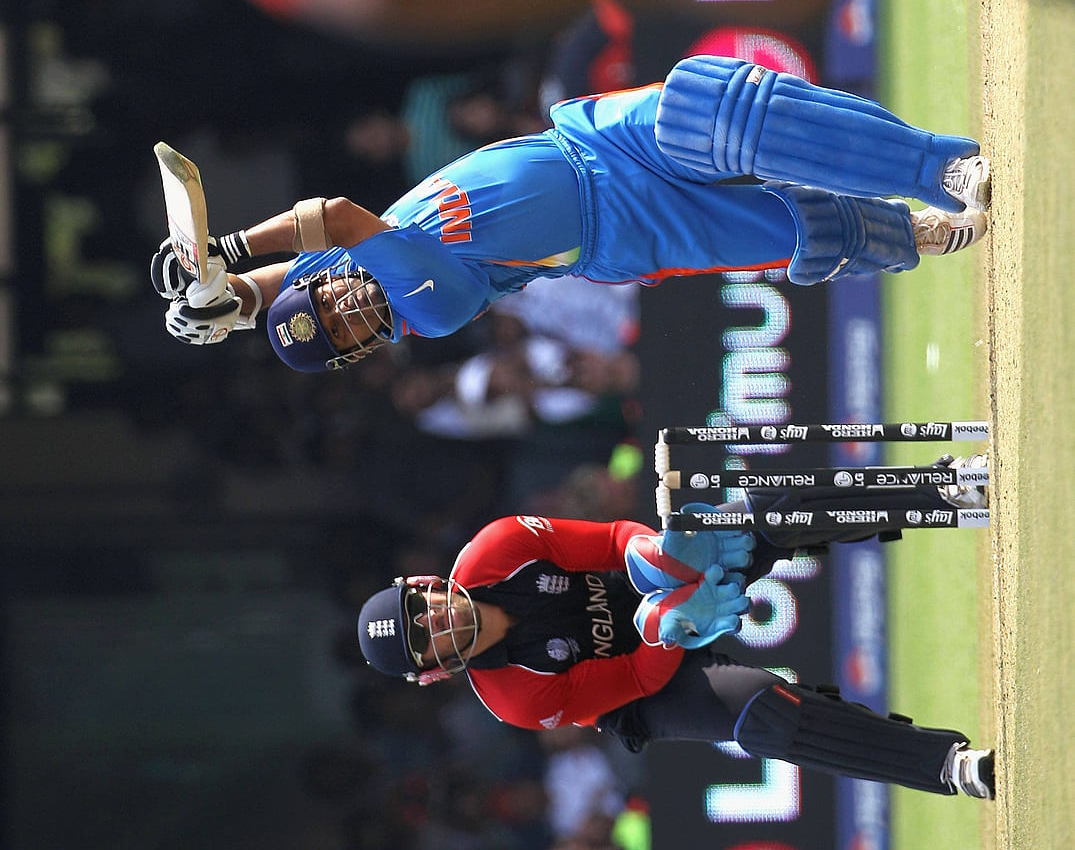

In [55]:
rot_img

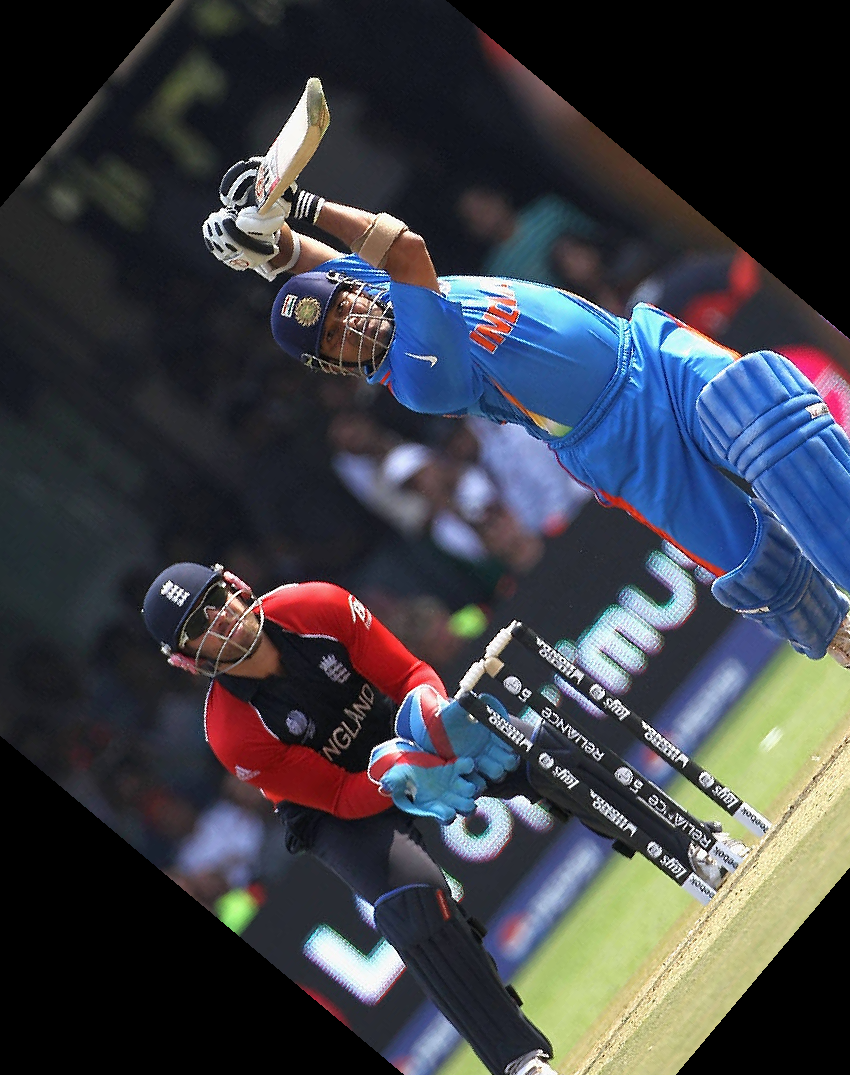

In [56]:
img_pil.rotate(50)

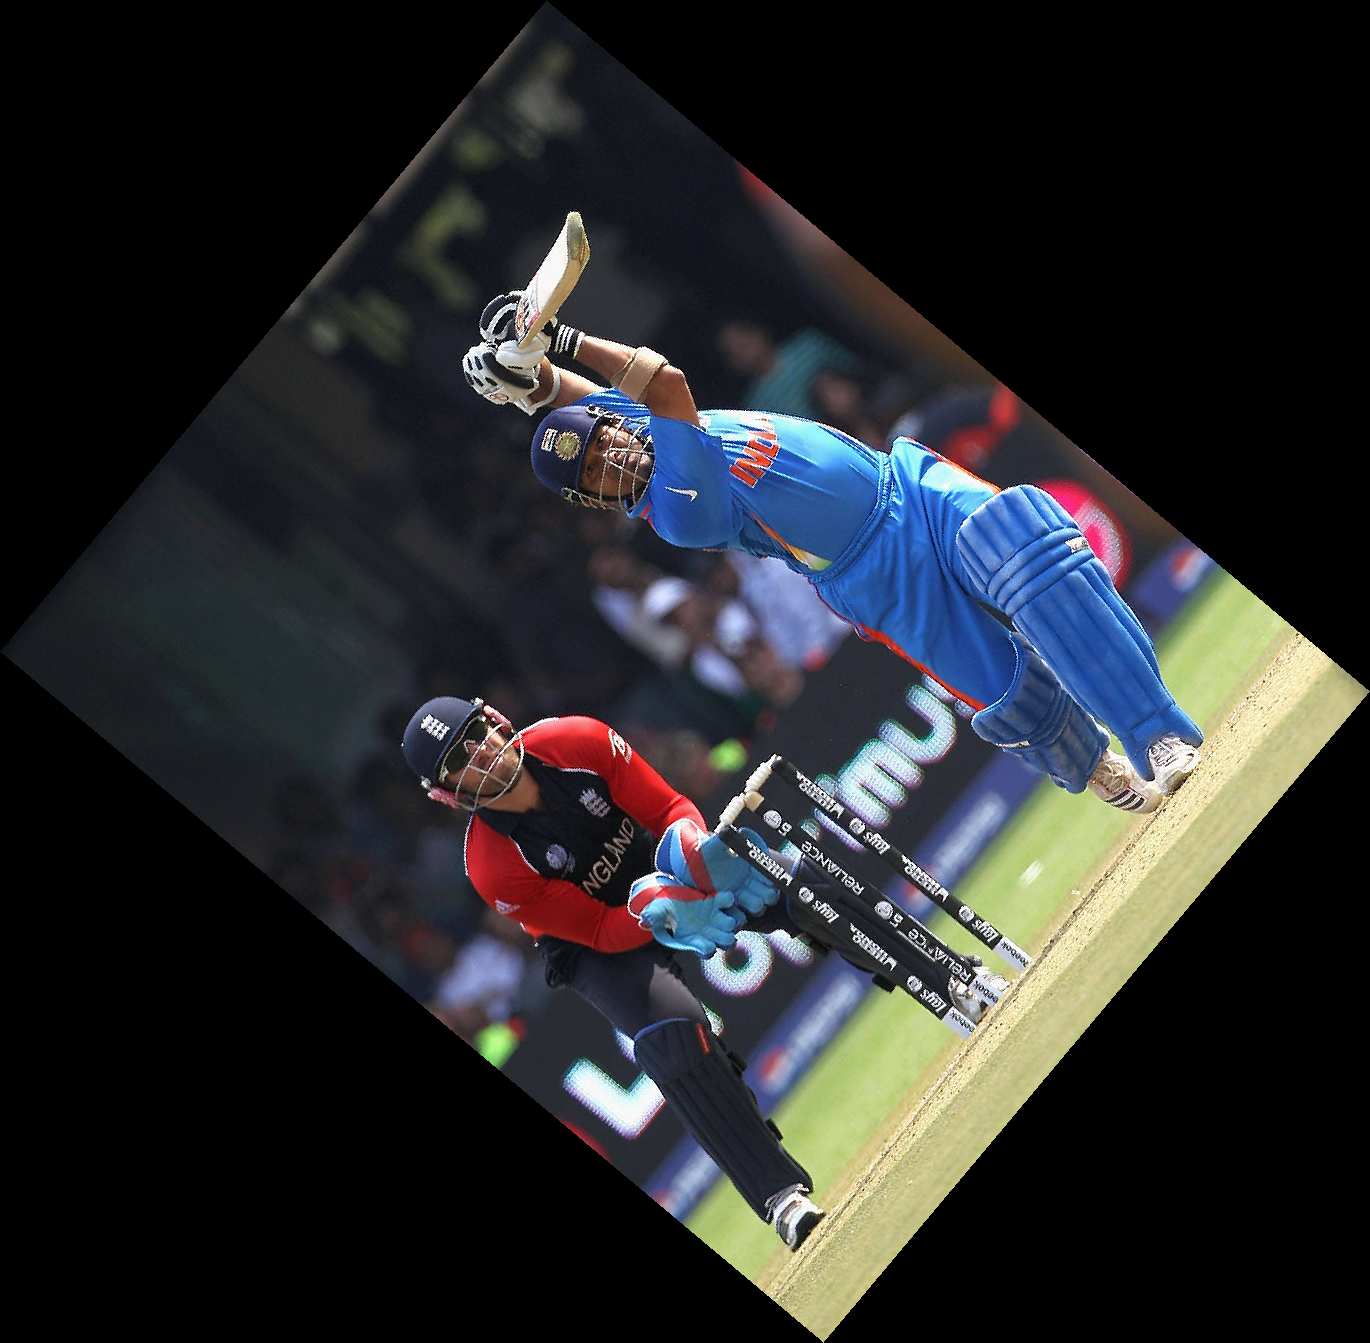

In [57]:
img_pil.rotate(50, expand=True)

#### Image Resizing

In [63]:
resized_image = cv2.resize(img, (700, 800))

In [64]:
cv2.imshow('translated image', resized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [67]:
resized_image.shape

(800, 700, 3)

#### Image Scaling

In [65]:
rescaled_image = cv2.resize(img, 
                           None, 
                           fx=0.5, 
                           fy=0.5)  # x and y axis is scaled down to 50%

In [66]:
cv2.imshow('translated image', rescaled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
rescaled_image.shape

(538, 425, 3)

#### Resizing using PIL

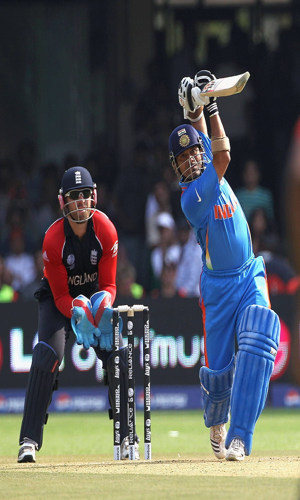

In [69]:
img_pil.resize((300, 500))

#### Resizing using skimage

In [71]:
from skimage.transform import resize
import matplotlib.pyplot as plt

In [72]:
img_ski = plt.imread('images/sachin.jpg')

In [75]:
res_img = resize(img_ski, 
                 (400,250))

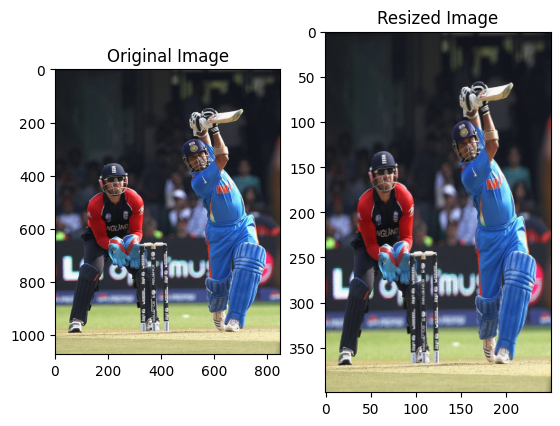

In [76]:
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img_ski)

plt.subplot(1,2,2)
plt.title('Resized Image')
plt.imshow(res_img)

#### Image Flipping

In [78]:
img_rgb = cv2.cvtColor(img, 
                       cv2.COLOR_BGR2RGB)

# horizontal flip
flip_hor = cv2.flip(img_rgb, 0)

# vertical flip
flip_ver = cv2.flip(img_rgb, 1)

# diagonal flip
flip_diag = cv2.flip(img_rgb, -1)

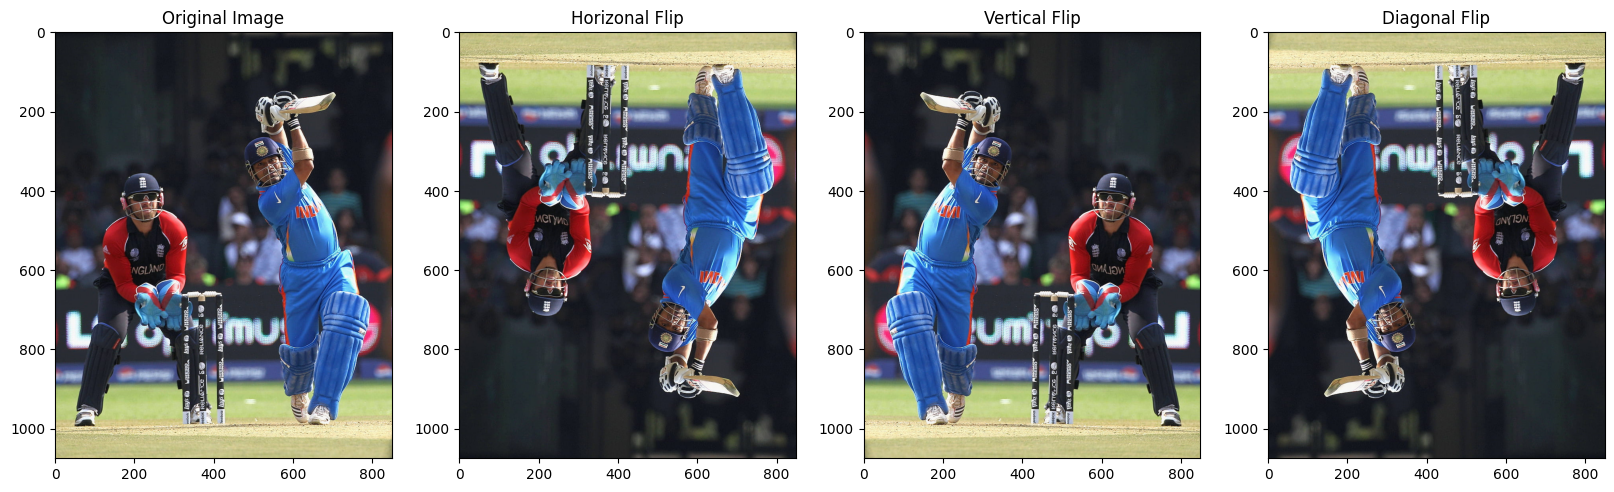

In [84]:
plt.figure(figsize=(20,10))

plt.subplot(1,4,1)
plt.title('Original Image')
plt.imshow(img_ski)

plt.subplot(1,4,2)
plt.title('Horizonal Flip')
plt.imshow(flip_hor)

plt.subplot(1,4,3)
plt.title('Vertical Flip')
plt.imshow(flip_ver)

plt.subplot(1,4,4)
plt.title('Diagonal Flip')
plt.imshow(flip_diag)


#### Image Cropping

In [106]:
img = cv2.imread('images/sachin.jpg')

In [107]:
# extact height and width values from the image
height, width, channels = img.shape
height, width

(1075, 850)

In [116]:
startRow = int(height*0.15)
startCol = int(width*0.15)
endRow = int(height*0.85)
endCol = int(width*0.85)

In [119]:
croppedImage = img_rgb[startRow:endRow, 
                       startCol:endCol]

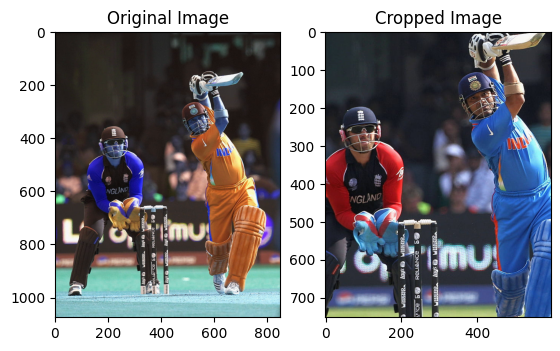

In [120]:
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Cropped Image')
plt.imshow(croppedImage)


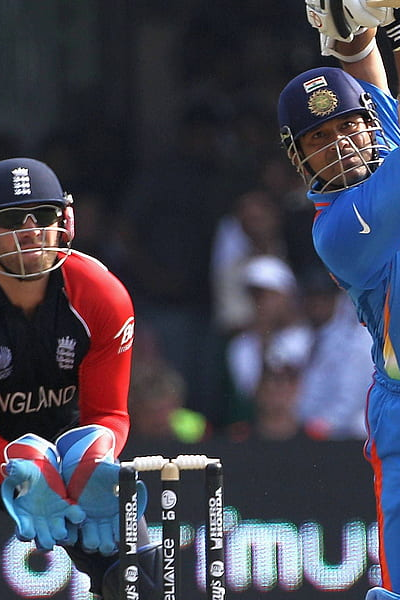

In [121]:
img_pil.crop((200, 200, 600, 800))

#### Image Shearing (tilting)

In [152]:
shear_x = 0.25
shear_y = 0.40

M = np.array([[1, shear_x, 0], 
              [shear_y, 1, 0],
              [0, 0, 1]])

In [153]:
M

array([[1.  , 0.25, 0.  ],
       [0.4 , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

In [154]:
img_shear = cv2.warpPerspective(img, 
                                M, 
                                (width, height))

In [155]:
cv2.imshow('sheared image', img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [158]:
M

array([[1.  , 0.25, 0.  ],
       [0.4 , 1.  , 0.  ],
       [0.  , 0.  , 1.  ]])

In [159]:
img_res = cv2.resize(img, (500, 600))
img_shear = cv2.warpPerspective(img_res, M, (width, height))

cv2.imshow('sheared image', img_shear)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Affine Transformation

* Affine transformations modify the spatial arrangement of pixels in an image by:

    - Scaling: Uniformly or non-uniformly changing the size of objects.
    - Translation: Shifting objects to different positions.
    - Rotation: Rotating objects around a fixed point.
    - Shearing: Tilting objects along an axis, causing slanted distortion.

In [147]:
tx = 50 # translation-x coordinate
ty = 100 # translation-y coordinate
angle = 45 # rotation
scale = 0.8 # scaling factor
shear_x = 0.25 # tilt on x-axis
shear_y = 0.30 # tilt on y-axis

# define the affine transformation matrix
M = np.float32([[scale*np.cos(np.radians(angle)), shear_x, tx],
               [shear_y, scale*np.sin(np.radians(angle)), ty]])

In [148]:
M

array([[  0.56568545,   0.25      ,  50.        ],
       [  0.3       ,   0.56568545, 100.        ]], dtype=float32)

In [149]:
img_new = cv2.warpAffine(img, M, (width, height))

In [150]:
cv2.imshow('final image', img_new)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Kernel

* In computer vision, a kernel, also known as a convolution matrix or mask, is a small matrix used to manipulate images in various ways.
* Think of it as a tiny window that "slides" across the iamage, performing calculations at each pixed based on the surrounding pixels and the kernel itself.
* These calculations can achieve various effects, making kernels incredibly versatile tools.